
# Demand data analysis

In [1]:
# Import libraries
import os #operating system
import pandas as pd #pandas for dataframe management
import matplotlib.pyplot as plt #matplotlib for plotting
import matplotlib.dates as mdates # alias for date formatting
import numpy as np # for generating synthetic data

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
# Data
dataPath = './' # set data path
df = pd.read_csv(os.path.join(dataPath, 'data.csv')) # read in data
df['date'] = pd.to_datetime(df['date']) # convert column to datetime
df.set_index('date', inplace=True) # set date as the index
df_avg = df.resample('D').mean() # resample by DAY and take the mean and create a new dataframe called df_avg


<AxesSubplot:xlabel='date'>

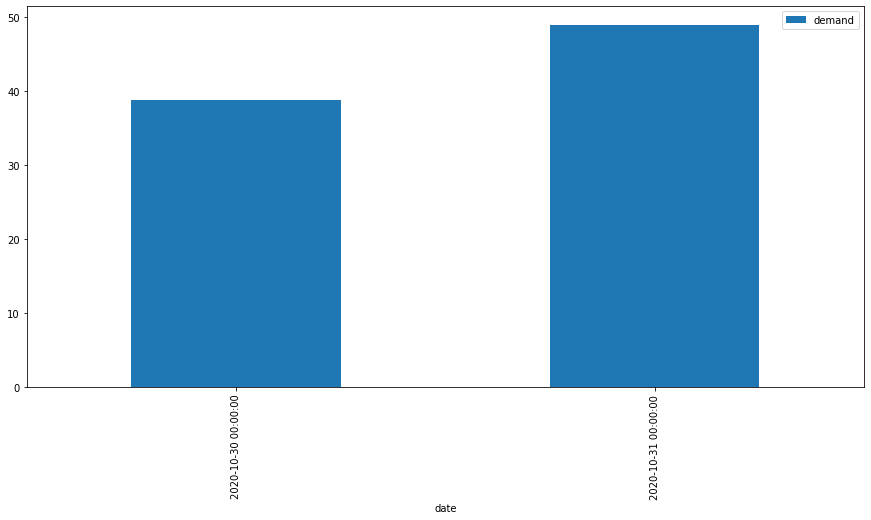

In [3]:
#plot data
# You would need to experiment around with some of the plot settings to get the desired result
fig, ax = plt.subplots(figsize=(15,7))
df_avg.plot(ax=ax, kind='bar')

# #set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Create synthetic data over time

In [4]:
# This extracts the data as an array, creates a sythetic interval, samples the data based on provided data, and creates a new time series
data = df['demand'].values
interval = pd.date_range('2018-11-01', '2020-10-30', freq='15min')
synthetic_data = np.random.choice(data, len(interval))
ts = pd.DataFrame({'demand': synthetic_data}, index=interval)
ts.index.name = 'date'

In [5]:
# do analysis
ts_daily = ts.resample('D').mean()
days = ts_daily.index.strftime("%Y-%m-%d")

ts_monthly = ts.resample('M').mean()
months = ts_monthly.index.strftime("%Y-%m")


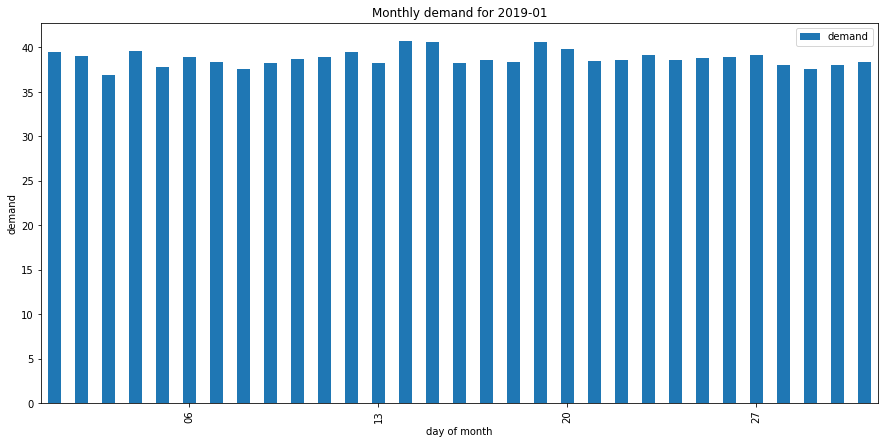

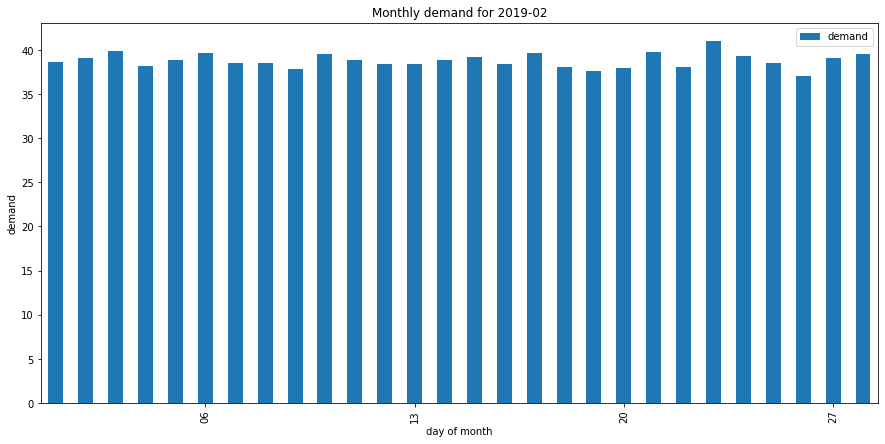

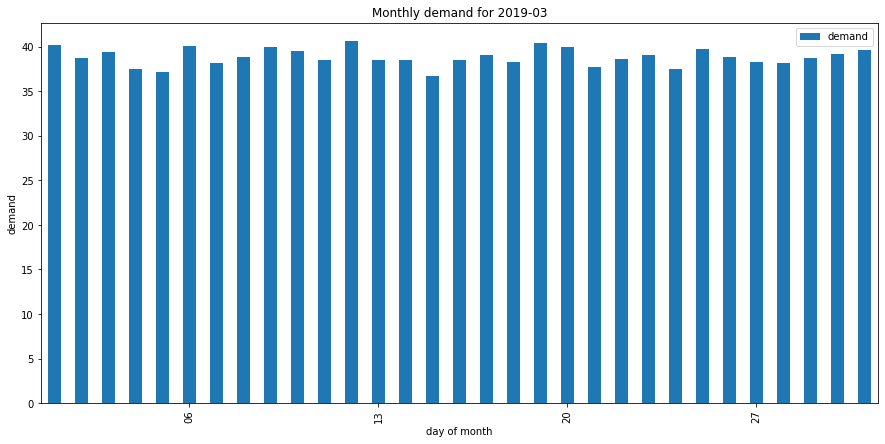

In [6]:
for month in months[2:5]:
    fig, ax = plt.subplots(figsize=(15,7))
    ts_daily[month].plot(ax=ax, kind='bar')

    # display
    plt.title("Monthly demand for {}".format(month))
    plt.xlabel("day of month")
    plt.ylabel('demand')

    # #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

    # plt.show()
    plt.savefig('figures/{}'.format(month))

In [7]:
## extra
df.head()

,demand
date,
2020-10-30 00:00:00,43.20
2020-10-30 00:15:00,46.08
2020-10-30 00:30:00,43.20
2020-10-30 00:45:00,43.20
2020-10-30 01:00:00,46.08
